Entropic Coding and Compression
===============================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour studies source coding using entropic coders (Huffman and arithmetic).

In [ ]:
from __future__ import division

import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from nt_toolbox.general import *
from nt_toolbox.signal import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

Source Coding and Entropy
-------------------------
Entropic coding converts a vector $x$ of integers into a binary stream
$y$. Entropic coding exploits the
redundancies in the statistical distribution of the entries of $x$ to
reduce as much as possible the size of $y$. The lower bound for the
number of bits $p$ of $y$ is the Shannon bound :

$$p=-\sum_ih(i)\log_2(h(i))$$

where $h(i)$ is the probability of apparition of symbol $i$ in $x$.

Fist we generate a simple binary signal $x$ so that $0$ has a probability $p$
to appear in $x$.

Probability of 0.

In [2]:
p = 0.1

Size.


In [3]:
n = 512

Signal, should be with token 1,2.

In [4]:
from numpy import random

x = (random.rand(n) > p) + 1

One can check the probabilities by computing the empirical histogram.

In [5]:
h = [np.sum(x == 1), np.sum(x == 2)]
h = h/np.sum(h)

print("Empirical p = %.2f" %h[0])

Empirical p = 0.11


We can compute the entropy of the distribution represented as a vector $h$ of proability that should sum to 1.
We take a max to avoid problems with null probabilties.

In [6]:
e = - np.sum(h*np.log2([max(e,1e-20) for e in h]))
print("Entropy = %.2f" %e)

Entropy = 0.49


Huffman Coding
--------------
A Hufman code $C$ associates to each symbol $i$ in $\{1,...,m\}$ a binary code $C_i$
whose length is as close as possible to the optimal bound
$-\log_2\left(h(i)\right)$, where $h(i)$ is the probability of apparition of the
symbol $i$.

We select a set of proabilities.

In [7]:
h = [.1, .15, .4, .15, .2]

The tree $T$ contains the codes and is generated by an iterative algorithm.
The initial "tree" is a collection of empty trees, pointing to the symbols numbers.

In [8]:
m = len(h)
T = [0] * m # create an empty tree

We build iteratively the Huffman tree
by grouping together the two erees that have the smallest probabilities.
The merged tree has a probability which is the sum of the two selected
probabilities.

Initial probability.

In [9]:
#we use the symbols i = 0,1,2,3,4 (as strings) with the associated probabilities h(i)

for i in range(m):
    T[i] = (h[i],str(i))

Iterative merging of the leading probabilities.

In [10]:
while len(T) > 1: 
    T.sort() #sort according to the first values of the tuples (the probabilities)
    t = tuple(T[:2])
    q = T[0][0] + T[1][0]
    T = T[2:] + [(q,t)]

We trim the computed tree by removing the probabilities.

In [11]:
def trim(T):
    T0 = T[1]
    if type(T0) == str:
        return T0
    else:
        return (trim(T0[0]),trim(T0[1]))

T = trim(T[0])

We display T using the ete3 package (install it in the terminal with "pip install ete3").

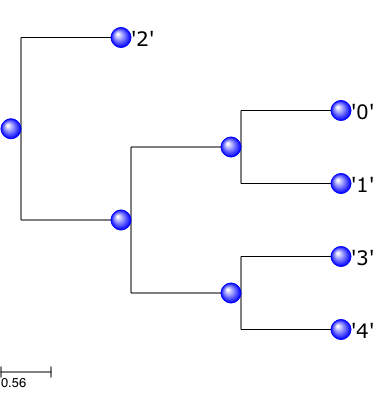

In [12]:
from ete3 import Tree, TreeStyle , NodeStyle, AttrFace, faces

t = Tree(str(T)+";")

ts = TreeStyle()
#ts.rotation = 90
ts.scale = 90
ts.branch_vertical_margin = 50 # 10 pixels between adjacent branches
ts.show_leaf_name = False #

nstyle = NodeStyle()
nstyle["shape"] = "sphere"
nstyle["size"] = 20
nstyle["fgcolor"] = "blue"

for n in t.traverse():
    n.set_style(nstyle)

for node in t.iter_leaves():
    node.add_face(AttrFace("name", fsize=20), column=0)  
    
t.render("%%inline", tree_style = ts)

Once the tree $T$ is computed, one can compute the code $C_{i}$
associated to each symbol $i$. This requires to perform a deep first
search in the tree and stop at each node.

In [13]:
codes = {}

def huffman_gencode(T,codes,c):
    if type(T) == str: #test if T is a leaf
        codes[T] = c
    else:
        huffman_gencode(T[0],codes, c + "0")
        huffman_gencode(T[1],codes, c + "1")

huffman_gencode(T,codes,"") 

Display the code.

In [14]:
for e in codes:
    print("Code of token " + e + ": " + codes[e])

Code of token 1: 101
Code of token 3: 110
Code of token 0: 100
Code of token 2: 0
Code of token 4: 111


We draw a vector $x$ according to the distribution $h$.

Size of the signal.

In [15]:
n = 1024

Randomization.

In [16]:
from numpy import random

def rand_discr(p, m = 1):
    """
        rand_discr - discrete random generator 
        
          y = rand_discr(p, n);
        
          y is a random vector of length n drawn from 
          a variable X such that
              p(i) = Prob( X=i )
        
          Copyright (c) 2004 Gabriel Peyré
    """

    # makes sure it sums to 1
    p = p/np.sum(p)
    
    n = len(p)
    coin = random.rand(m)
    cumprob = np.append(0,+ np.cumsum(p))
    sample = np.zeros(m)
    
    for j in range(n):
        ind = [(coin > cumprob[j]) & (coin <= cumprob[j+1])]
        sample[ind] = j
        
    return sample

x = rand_discr(h, n)

__Exercise 1__

Implement the coding of the vector $x$ to obtain a binary vector $y$, which corresponds to replacing each sybmol $x(i)$ by the code $C_{x(i)}$.

In [17]:
run -i nt_solutions/coding_2_entropic/exo1

In [18]:
## Insert your code here.

Compare the length of the code with the entropy bound.

In [19]:
e = - np.sum(h*np.log2([max(e,1e-20) for e in h]))
print("Entropy bound = %.2f" %(n*e))
print("Huffman code  = %.2f" %len(y)) 

Entropy bound = 2197.95
Huffman code  = 2228.00


Decoding is more complicated, since it requires to iteratively parse the tree $T$.

Initial empty decoded stream.

In [20]:
x1 = []

Perform decoding.

In [21]:
T0 = T
for e in y:
    if e == '0':
            T0 = T0[0]
    else:
            T0 = T0[1]
    if type(T0) == str:
        i = i+1
        x1 += T0
        T0 = T

We test if the decoding is correct.

In [22]:
from numpy import linalg

err = linalg.norm(np.subtract(x,[float(e) for e in x1]))
print("Error (should be zero) : %f " %err)

Error (should be zero) : 0.000000 


Huffman Block Coding
--------------------
A Huffman coder is inefficient because it can distribute only an integer
number of bit per symbol. In particular, distribution where one of the
symbol has a large probability are not well coded using a Huffman code.
This can be aleviated by replacing the set of $m$ symbols by $m^q$
symbols obtained by packing the symbols by blocks of $q$ (here we use $m=2$ for a binary alphabet). This breaks
symbols with large probability into many symbols with smaller proablity,
thus approaching the Shannon entropy bound.


Generate a binary vector with a high probability of having 1, so that the
Huffman code is not very efficient (far from Shanon bound).

Proability of having 0.

In [23]:
t = .12

Probability distriution.

In [24]:
h = [t, 1-t]

Generate signal.

In [25]:
from numpy import random

n = 4096*2
x = (random.rand(n) > t) + 1

For block of length $q=3$, create a new vector by coding each block
with an integer in $\{1,...,m^q=2^3\}$. The new length of the vector is
$n_1/q$ where $n_1=\lceil n/q\rceil q$.

Block size.

In [26]:
q = 3

Maximum token value.

In [27]:
m = 2

New size.

In [28]:
n1 = (n//q+1)*q

New vector.

In [29]:
x1 = np.zeros(n1)
x1[:len(x)] = x
x1[len(x):] = 1
x1 = x1 - 1
x2 = []

for i in range(0,n1,q):
    mult = [m**j for j in range(q)]
    x2.append(sum(x1[i:i+q]*mult))

We generate the probability table $H$ of $x_1$ that represents the probability
of each new block symbols in $\{1,...,m^q\}$.

In [30]:
H = h
for i in range(q-1):
    Hold = H
    H = []
    for j in range(len(h)):
        H = H + [e*h[j] for e in Hold]

A simpler way to compute this block-histogram is to use the Kronecker product.

In [31]:
H = h
for i in range(1,q):
    H = np.kron(H, h)

__Exercise 2__

For various values of block size $k$, Perform the Huffman coding and compute the length of the code.
Compare with the entropy lower bound.

Entropy bound = 0.529361
---
Huffman(block size = 1) = 1.000122
Huffman(block size = 2) = 0.675171
Huffman(block size = 3) = 0.572876
Huffman(block size = 4) = 0.544434
Huffman(block size = 5) = 0.537476
Huffman(block size = 6) = 0.532593
Huffman(block size = 7) = 0.543579
Huffman(block size = 8) = 0.539795
Huffman(block size = 9) = 0.537231
Huffman(block size = 10) = 0.537109


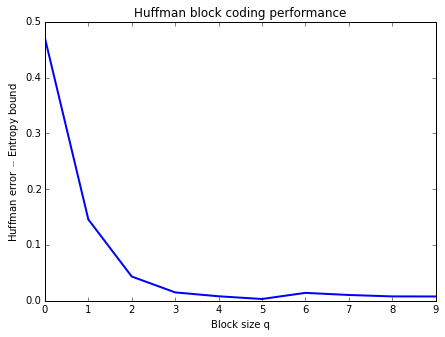

In [32]:
run -i nt_solutions/coding_2_entropic/exo2

In [33]:
## Insert your code here.